# Can the price of Bitcoin be predicted using machine learning and validated using the Granger Causality test?

In [185]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

#Hiding warning messages for improved presentation
import warnings
warnings.filterwarnings('ignore')

In [186]:
data = pd.read_excel('C:\\Users\\Danie\\OneDrive - University of Strathclyde\Finance Project\daniel_sloan.xlsx')

# Data Exploration

In [187]:
data.head()

,date,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI,Google trends
0,2019-05-02,5402.42,5.400366e+07,1.126911,516500.0,439549,6.353030e+12,65.625219,8.710334e+08,NaN,160.85,73.68,271.97,0.069020,8036.770020,26307.789063,NaN
1,2019-05-01,5350.91,4.421352e+07,1.295071,551918.0,346486,6.353030e+12,85.484635,8.256662e+08,NaN,162.19,74.30,267.99,0.070338,8049.640137,26430.140625,NaN
2,2019-04-30,5247.73,5.147717e+07,1.203268,529709.0,363207,6.353030e+12,70.954700,8.838533e+08,NaN,155.17,67.95,237.57,0.064661,8095.390137,26592.910156,NaN
3,2019-04-29,5284.86,5.147717e+07,0.977574,406877.0,383291,6.353030e+12,47.953930,4.371152e+08,NaN,157.29,69.78,255.55,0.068620,8161.850098,26554.390625,NaN
4,2019-04-28,5271.75,4.326609e+07,1.170310,421593.0,359008,6.353030e+12,54.420927,4.530519e+08,NaN,158.50,72.12,264.12,0.070189,NaN,NaN,NaN


In [188]:
#Noticed NaN values in last 3 columns will deal with this after data is split.
data.describe()

,BTC Price,BTC network hashrate,Average BTC block size,NUAU - BTC,Number TX - BTC,Difficulty - BTC,TX fees - BTC,Estimated TX Volume USD - BTC,Gold in USD,Ethereum Price,Litecoin Price,Bitcoin Cash Price,Cardano Price,Nasdaq composite index,DJI
count,3732.000000,3.731000e+03,3732.000000,3.724000e+03,3732.000000,3.732000e+03,3732.000000,3.732000e+03,2660.000000,1356.000000,2725.000000,646.000000,576.000000,2570.000000,2570.000000
mean,1410.231592,5.770534e+06,0.376481,2.030792e+05,108018.973205,7.851725e+11,50.869158,2.541152e+08,1304.666316,205.232756,25.928037,745.312570,0.164260,4236.322852,16145.892578
std,2830.209487,1.328853e+07,0.390893,2.151034e+05,111329.242808,1.823258e+12,106.093123,5.722561e+08,207.329139,264.001372,49.035779,627.015641,0.183717,1800.834827,5061.070587
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,810.000000,0.000000,0.000000,77.370000,0.018414,1268.640015,6547.049805
25%,0.000000,8.161653e+00,0.016514,1.015675e+04,5653.250000,1.159929e+06,4.261553,4.463355e+05,1195.000000,10.535000,1.840000,305.357500,0.044131,2702.712525,12093.152832
50%,237.015000,2.815852e+04,0.191291,1.325365e+05,63093.000000,3.129573e+09,18.132637,3.909239e+07,1272.950000,113.210000,3.850000,544.520000,0.088091,4143.464843,16167.600098
75%,770.440000,1.810334e+06,0.766174,4.018832e+05,209995.250000,2.435552e+11,42.538199,1.990373e+08,1368.875000,300.707500,30.870000,1031.975000,0.202555,5245.957642,18452.828125
max,19475.800000,6.186626e+07,1.304964,1.072861e+06,490644.000000,7.454970e+12,1495.946477,5.760245e+09,1895.000000,1397.480000,359.130000,3909.000000,1.170000,8161.850098,26828.390625


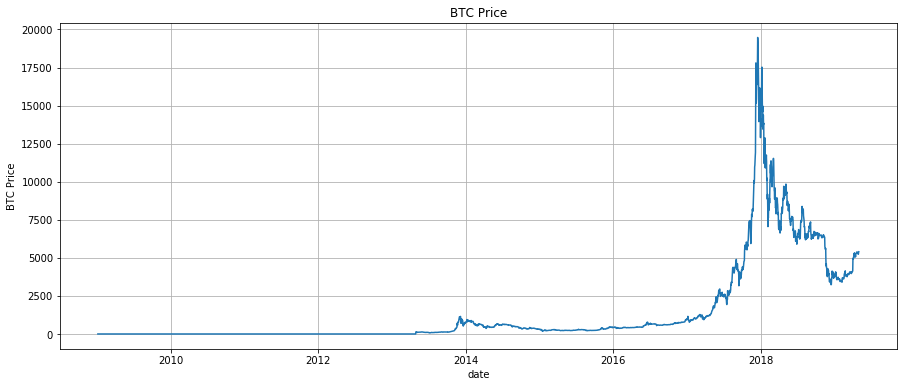

In [189]:
fig, ax = plt.subplots()
ax.plot(data['date'],data['BTC Price'])

ax.set(xlabel='date', ylabel='BTC Price',
       title='BTC Price')
ax.grid()
plt.rcParams['figure.figsize'] = (15,6)

In [190]:
#Bitcoin price was 0.00 for a long time so the first quartile is 0.00. These are no use for this data analysis so will be removed
print ((data['BTC Price'] == 0).sum())

1576


In [191]:
#Dropping the 0.00s
data.drop(data.loc[data['BTC Price']==0].index, inplace=True)

In [192]:
print ((data['BTC Price'] == 0).sum())

0


In [193]:
#Splitting the data into two parts 2013- 2017 and 2017 onwards
split_date = pd.datetime(2018,12,31)

data1 = data.loc[data['date'] <= split_date]
data2 = data.loc[data['date'] > split_date]

# Phase 1 (2013-2017)

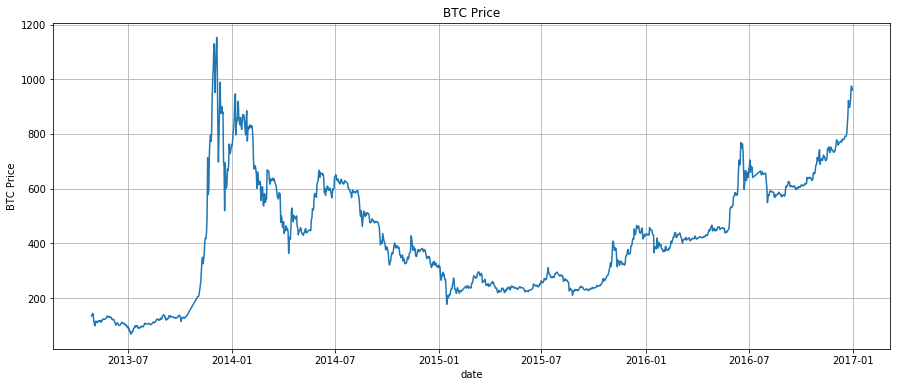

In [144]:
fig, ax = plt.subplots()
ax.plot(data1['date'],data1['BTC Price'])

ax.set(xlabel='date', ylabel='BTC Price',
       title='BTC Price')
ax.grid()
plt.rcParams['figure.figsize'] = (15,6)

Data Cleansing

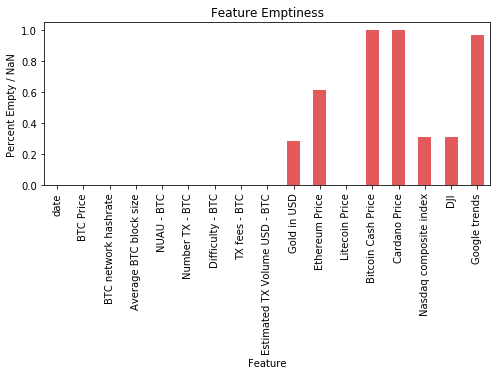

In [145]:
#Visualising the missing data for 2013-2016
percentage_missing_data = data1.isnull().sum() / data1.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (8, 3))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [146]:
#Dropping variables as they are all over 20% empty and data records are limited
data1 = data1.drop(['Gold in USD', 'Bitcoin Cash Price', 'Cardano Price', 'Nasdaq composite index', 'DJI', 'Google trends'], axis=1)

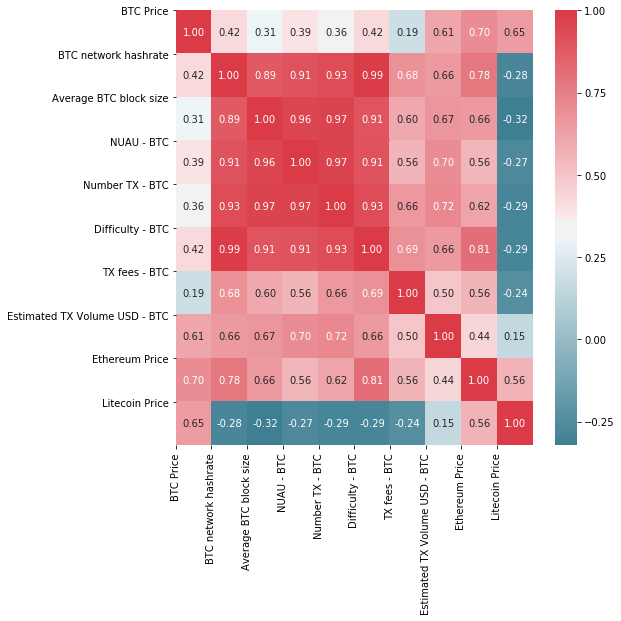

In [147]:
corr = data1.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

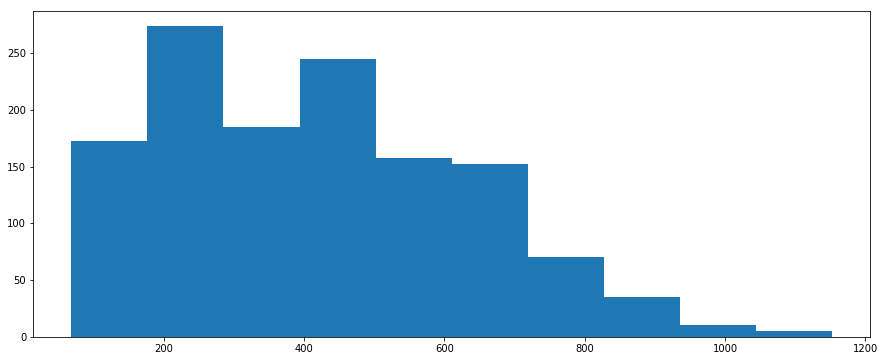

In [148]:
hist =plt.hist(data1['BTC Price'])

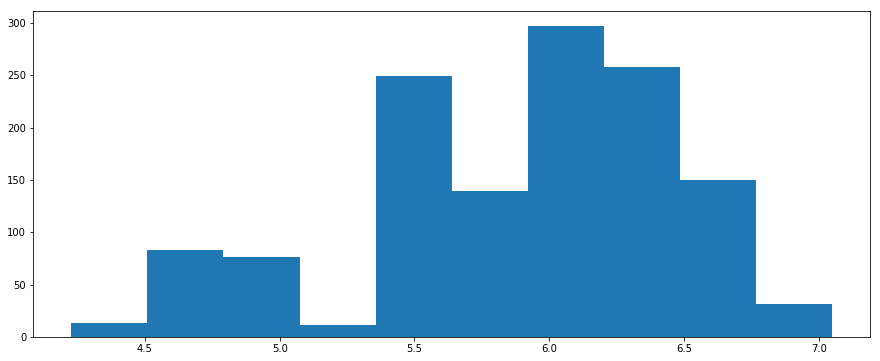

In [149]:
#Transforming the BTC price varibale with the natural log
data1['BTC_Price_log']=np.log(data1['BTC Price'])
hist =plt.hist(data1['BTC_Price_log'])

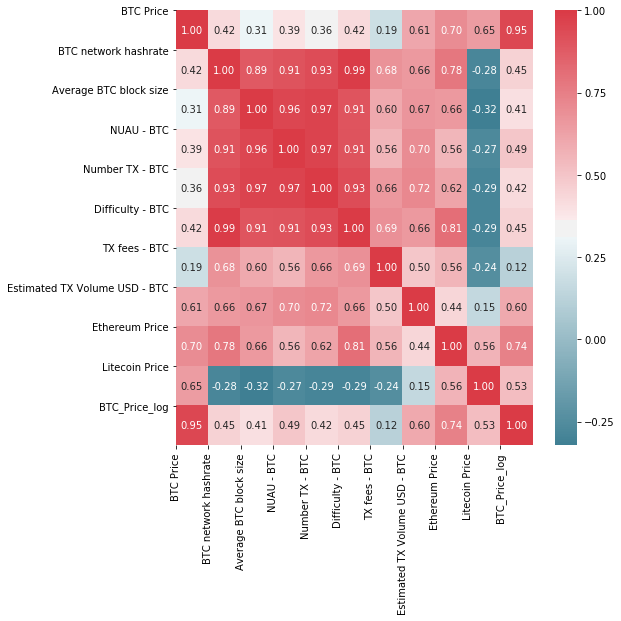

In [150]:
corr = data1.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [151]:
data1 = data1.drop(['TX fees - BTC'], axis=1)
data1=data1.dropna()
data1.count() 

date                             507
BTC Price                        507
BTC network hashrate             507
Average BTC block size           507
NUAU - BTC                       507
Number TX - BTC                  507
Difficulty - BTC                 507
Estimated TX Volume USD - BTC    507
Ethereum Price                   507
Litecoin Price                   507
BTC_Price_log                    507
dtype: int64

Preparing Data for Models

In [152]:
X=data1.drop(['date','BTC Price', 'BTC_Price_log'], axis=1)
y= data1['BTC_Price_log']

In [153]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

# Multiple Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40) 
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

Coefficients: 
 [-0.05948675 -0.04779399  0.09400267  0.01229769  0.32168691  0.01559421
 -0.03036474  0.09203232]
Mean squared error: 0.01
Variance score: 0.93
Mean Absolute Error: 0.08


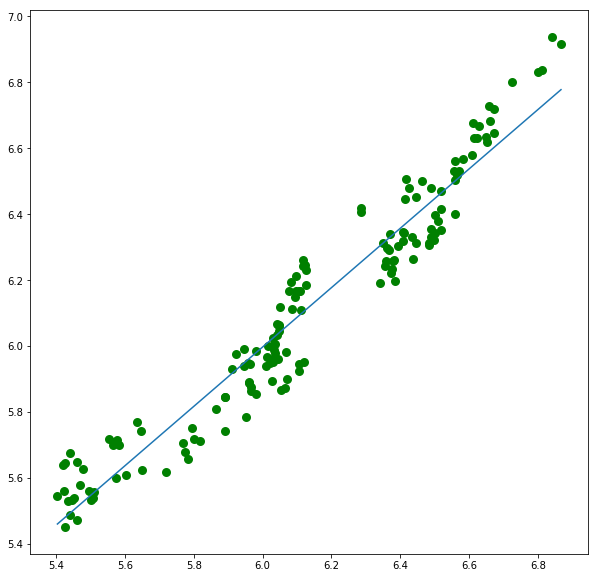

In [155]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))


# Plot outputs
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# SVR 

Mean squared error: 0.01
Variance score: 0.94
Mean Absolute Error: 0.06


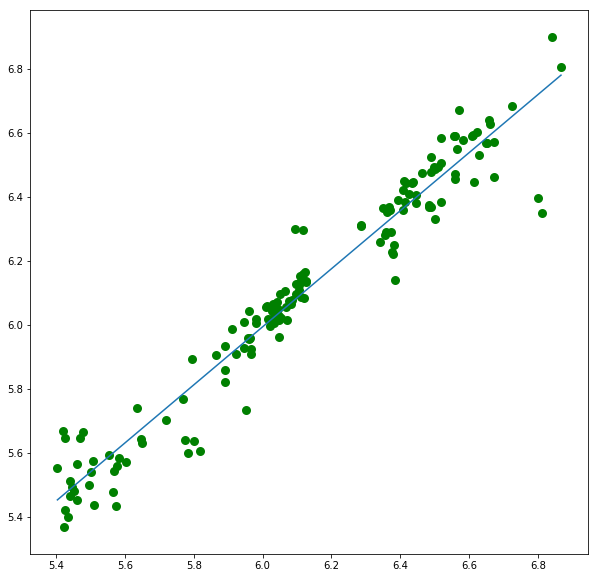

In [156]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# SGD Regressor

Mean squared error: 0.01
Variance score: 0.93
Mean Absolute Error: 0.09


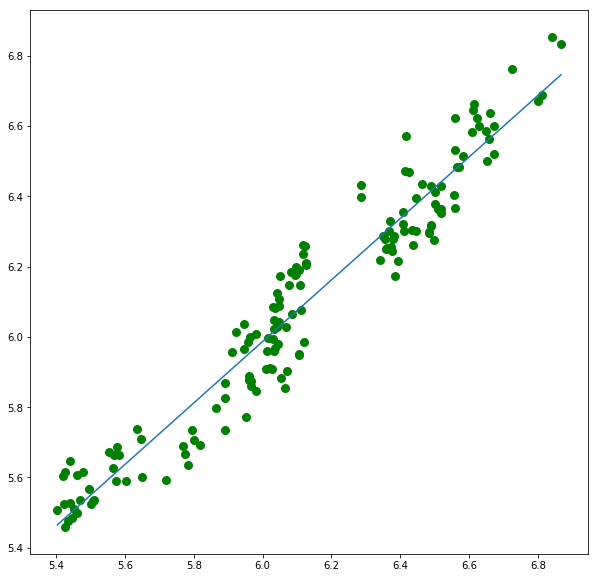

In [157]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# Granger Causality Test 

In [158]:
#Null hypothesis - independent variable does not Granger cause BTC Price
grangercausalitytests(data1[['BTC Price', 'BTC network hashrate']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Average BTC block size']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'NUAU - BTC']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Number TX - BTC']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Difficulty - BTC']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Estimated TX Volume USD - BTC']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Ethereum Price']], maxlag=2)
grangercausalitytests(data1[['BTC Price', 'Litecoin Price']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.1956  , p=0.0410  , df_denom=503, df_num=1
ssr based chi2 test:   chi2=4.2206  , p=0.0399  , df=1
likelihood ratio test: chi2=4.2031  , p=0.0403  , df=1
parameter F test:         F=4.1956  , p=0.0410  , df_denom=503, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5380  , p=0.0800  , df_denom=500, df_num=2
ssr based chi2 test:   chi2=5.1267  , p=0.0770  , df=2
likelihood ratio test: chi2=5.1008  , p=0.0780  , df=2
parameter F test:         F=2.5380  , p=0.0800  , df_denom=500, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4357  , p=0.5095  , df_denom=503, df_num=1
ssr based chi2 test:   chi2=0.4383  , p=0.5079  , df=1
likelihood ratio test: chi2=0.4381  , p=0.5080  , df=1
parameter F test:         F=0.4357  , p=0.5095  , df_denom=503, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5642  , p=0.5692  

{1: ({'ssr_ftest': (9.280744540074277, 0.0024373446406842606, 503.0, 1),
   'ssr_chi2test': (9.336096893195993, 0.002246835622510578, 1),
   'lrtest': (9.251012724096654, 0.0023536522950322186, 1),
   'params_ftest': (9.28074454007404, 0.0024373446406845247, 503.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (6.513077873958594, 0.0016129623397635948, 500.0, 2),
   'ssr_chi2test': (13.15641730539636, 0.001390337643008048, 2),
   'lrtest': (12.987959312675684, 0.0015125177140824016, 2),
   'params_ftest': (6.51307787395851, 0.0016129623397636936, 500.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# GridSearch

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)
# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr_gs.fit(x, y)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr_gs.cv_results_['mean_test_score']
stds = svr_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
#Getting best parameters
    
print("The best set of parameters are:")
svr_gs.best_estimator_

Tuning hyper-parameters
Grid scores on training set:
-0.067 (+/-0.106) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.031 (+/-0.044) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.049 (+/-0.089) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.053 (+/-0.073) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.068 (+/-0.096) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-0.108 (+/-0.184) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-0.114 (+/-0.200) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.129 (+/-0.240) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-0.031 (+/-0.043) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.035 (+/-0.065) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.048 (+/-0.069) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-0.044 (+/-0.046) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-0.079 (+/-0.120) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-0.126 (+/-0.192) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-0.125 (+/-0.197) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Mean squared error: 0.01
Variance score: 0.92
Mean Absolute Error: 0.09


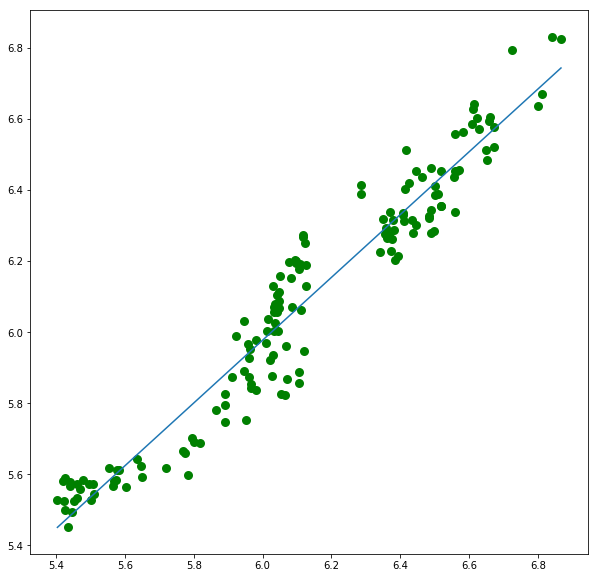

In [160]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf', C=10, gamma = 0.0001, epsilon = 0.01)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# Phase 2 (2017 to May 2019)

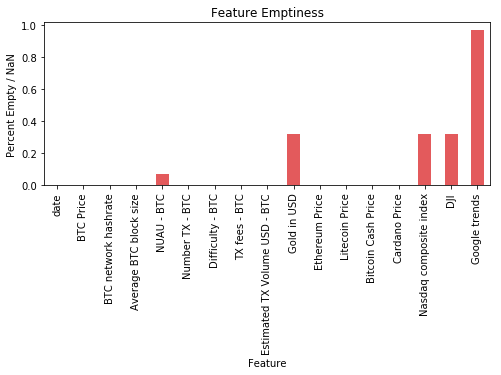

In [194]:
#Visualising the missing data for 2017 onwards
percentage_missing_data = data2.isnull().sum() / data2.shape[0]
ax = percentage_missing_data.plot(kind = 'bar', color='#E35A5C', figsize = (8, 3))
ax.set_xlabel('Feature')
ax.set_ylabel('Percent Empty / NaN')
ax.set_title('Feature Emptiness')
plt.show()

In [195]:
data2 = data2.drop(['Gold in USD', 'Nasdaq composite index', 'DJI', 'Google trends'], axis=1)

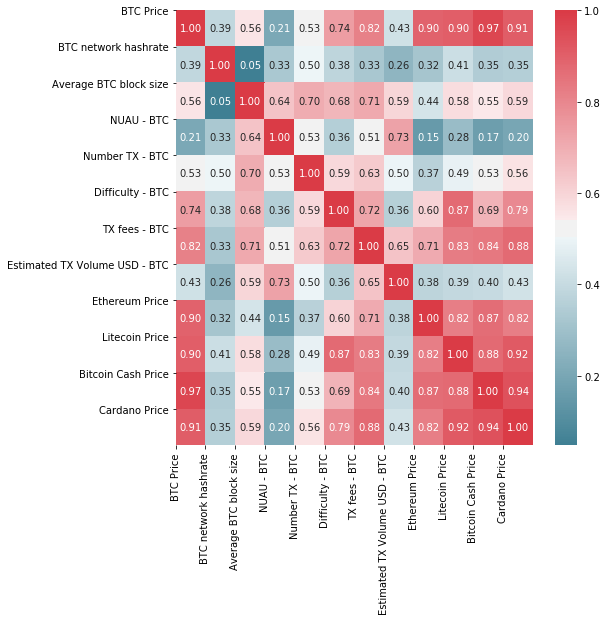

In [196]:
corr = data2.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

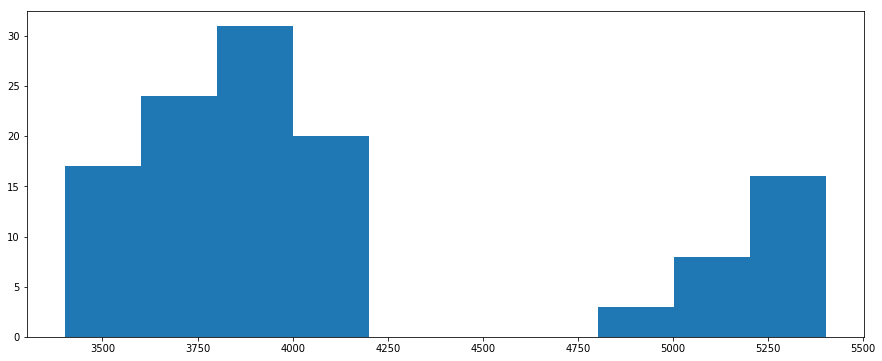

In [197]:
hist =plt.hist(data2['BTC Price'])

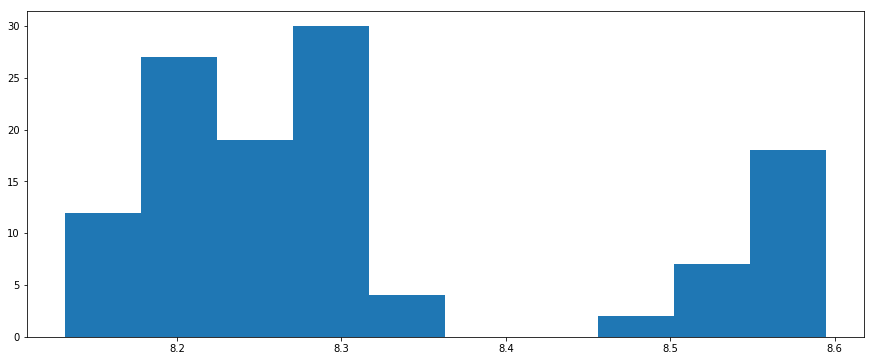

In [198]:
data2['BTC_Price_log']=np.log(data2['BTC Price'])
hist =plt.hist(data2['BTC_Price_log'])

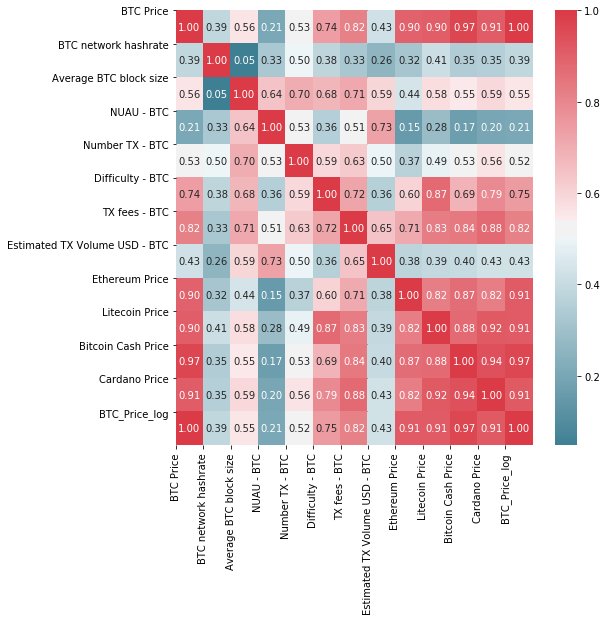

In [199]:
corr = data2.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [200]:
data2 = data2.drop(['NUAU - BTC'], axis=1)
data2=data2.dropna()
data2.count() 

date                             119
BTC Price                        119
BTC network hashrate             119
Average BTC block size           119
Number TX - BTC                  119
Difficulty - BTC                 119
TX fees - BTC                    119
Estimated TX Volume USD - BTC    119
Ethereum Price                   119
Litecoin Price                   119
Bitcoin Cash Price               119
Cardano Price                    119
BTC_Price_log                    119
dtype: int64

Preparing Data for Models

In [201]:
X=data2.drop(['date','BTC Price', 'BTC_Price_log'], axis=1)
y= data2['BTC_Price_log']

In [202]:
#Scaling the independent variables
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(X)

# Multiple  Linear Regression

In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40) 
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

Coefficients: 
 [-0.00313199 -0.00969458  0.00838232  0.01736844 -0.01027907  0.01029047
  0.03387828  0.02976771  0.10178768 -0.03199964]
Mean squared error: 0.00
Variance score: 0.96
Mean Absolute Error: 0.02


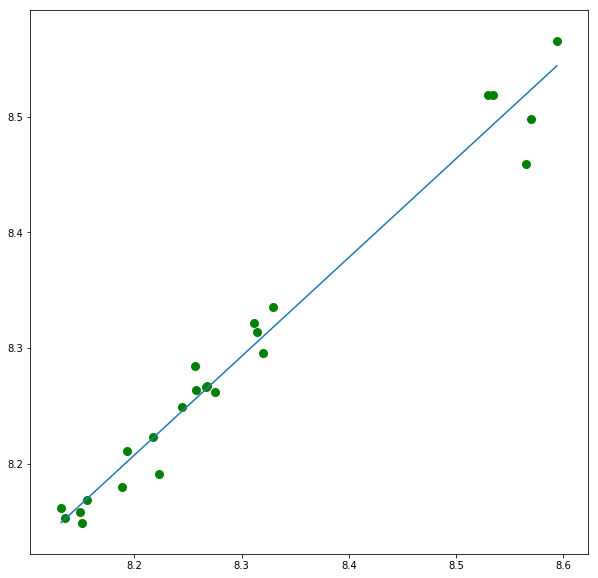

In [204]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The coefficients
print('Coefficients: \n', linreg.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))


# Plot outputs
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# SVR

Mean squared error: 0.00
Variance score: 0.82
Mean Absolute Error: 0.04


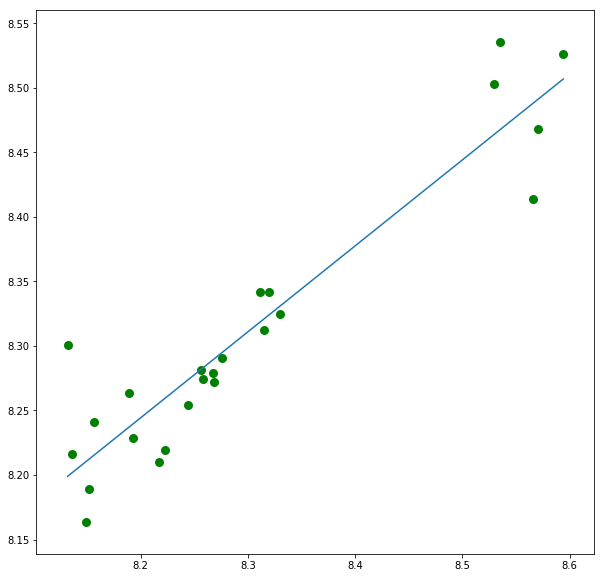

In [205]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf', C=1e3, gamma = 0.5, epsilon = 0.01)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# SGD Regressor

Mean squared error: 0.01
Variance score: 0.68
Mean Absolute Error: 0.07


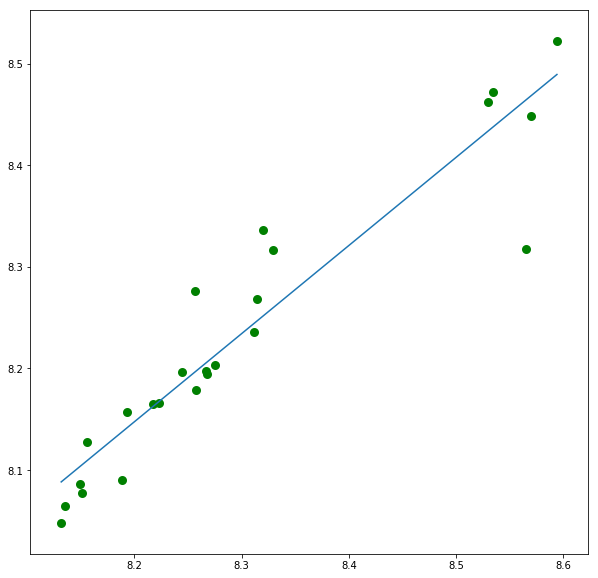

In [206]:
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# Granger Causality Test 

In [207]:
#Null hypothesis - independent variable does not Granger cause BTC Price
grangercausalitytests(data2[['BTC Price', 'BTC network hashrate']], maxlag=2)
grangercausalitytests(data2[['BTC Price', 'Difficulty - BTC']], maxlag=2)
grangercausalitytests(data2[['BTC Price', 'Estimated TX Volume USD - BTC']], maxlag=2)
grangercausalitytests(data2[['BTC Price', 'Ethereum Price']], maxlag=2)
grangercausalitytests(data2[['BTC Price', 'Litecoin Price']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7690  , p=0.3823  , df_denom=115, df_num=1
ssr based chi2 test:   chi2=0.7891  , p=0.3744  , df=1
likelihood ratio test: chi2=0.7865  , p=0.3752  , df=1
parameter F test:         F=0.7690  , p=0.3823  , df_denom=115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5951  , p=0.5532  , df_denom=112, df_num=2
ssr based chi2 test:   chi2=1.2433  , p=0.5371  , df=2
likelihood ratio test: chi2=1.2367  , p=0.5388  , df=2
parameter F test:         F=0.5951  , p=0.5532  , df_denom=112, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0363  , p=0.8492  , df_denom=115, df_num=1
ssr based chi2 test:   chi2=0.0372  , p=0.8470  , df=1
likelihood ratio test: chi2=0.0372  , p=0.8470  , df=1
parameter F test:         F=0.0363  , p=0.8492  , df_denom=115, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1159  , p=0.8906  

{1: ({'ssr_ftest': (0.7115650586487635, 0.4006759407417866, 115.0, 1),
   'ssr_chi2test': (0.7301276253961225, 0.3928418232639599, 1),
   'lrtest': (0.7278780596557226, 0.3935718577955887, 1),
   'params_ftest': (0.711565058648789, 0.40067594074177804, 115.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (5.604746715441339, 0.004787796000297143, 112.0, 2),
   'ssr_chi2test': (11.709917244761368, 0.0028656541726086258, 2),
   'lrtest': (11.160306366818759, 0.003771987668603592, 2),
   'params_ftest': (5.6047467154412445, 0.004787796000297536, 112.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [175]:
   from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
scorer = make_scorer(mean_squared_error, greater_is_better=False)
# Tuning of parameters for regression by cross-validation
K = 5               # Number of cross valiations

# Parameters for tuning
parameters = [{'kernel': ['rbf'], 'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],'C': [1, 10, 100, 1000, 10000]}]
print("Tuning hyper-parameters")
svr_gs = GridSearchCV(SVR(epsilon = 0.01), parameters, cv = K, scoring=scorer)
svr_gs.fit(x, y)

# Checking the score for all parameters
print("Grid scores on training set:")
means = svr_gs.cv_results_['mean_test_score']
stds = svr_gs.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svr_gs.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    
#Getting best parameters
    
print("The best set of parameters are:")
svr_gs.best_estimator_    

Tuning hyper-parameters
Grid scores on training set:
-0.623 (+/-1.427) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.277 (+/-0.526) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.150 (+/-0.230) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.101 (+/-0.209) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
-0.134 (+/-0.279) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
-0.229 (+/-0.369) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
-0.262 (+/-0.431) for {'C': 1, 'gamma': 0.6, 'kernel': 'rbf'}
-0.366 (+/-0.716) for {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}
-0.286 (+/-0.530) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
-0.341 (+/-0.570) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.069 (+/-0.038) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
-0.115 (+/-0.183) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
-0.115 (+/-0.277) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
-0.184 (+/-0.372) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
-0.213 (+/-0.390) for {'C': 10, 'gamma': 0.6, 'kernel': 'rbf'

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Mean squared error: 0.02
Variance score: 0.97
Mean Absolute Error: 0.10


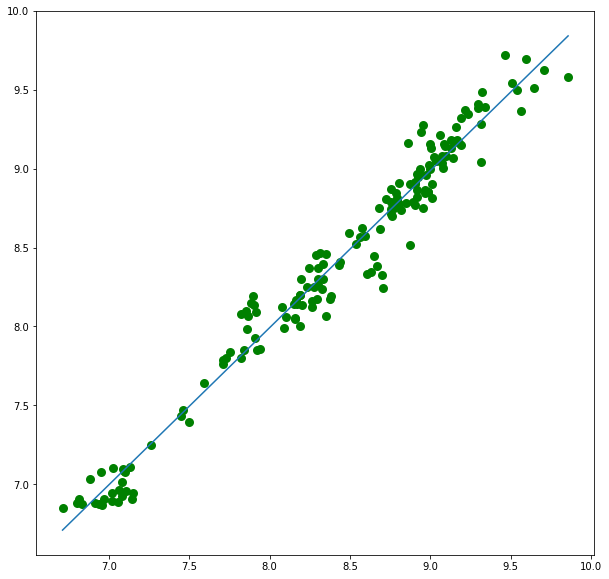

In [176]:
from sklearn.svm import SVR
regr = SVR(kernel='rbf', C=10, gamma = 0.01, epsilon = 0.01)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))
# The mean absolute error
print('Mean Absolute Error: %.2f' % mean_absolute_error(y_test, y_pred))

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='green', linewidth =3)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred, 1))(np.unique(y_test)))
plt.show()

# Granger Causality Test for Combined Dataset

In [177]:
#Null hypothesis - independent does not Granger cause BTC Price
data = data.drop(['Gold in USD', 'Bitcoin Cash Price', 'Cardano Price', 'Nasdaq composite index', 'DJI', 'Google trends'], axis=1)
data=data.dropna()
grangercausalitytests(data[['BTC Price', 'BTC network hashrate']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Average BTC block size']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'NUAU - BTC']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Number TX - BTC']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Difficulty - BTC']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Estimated TX Volume USD - BTC']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Ethereum Price']], maxlag=2)
grangercausalitytests(data[['BTC Price', 'Litecoin Price']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.4022  , p=0.0361  , df_denom=1344, df_num=1
ssr based chi2 test:   chi2=4.4120  , p=0.0357  , df=1
likelihood ratio test: chi2=4.4048  , p=0.0358  , df=1
parameter F test:         F=4.4022  , p=0.0361  , df_denom=1344, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2624  , p=0.1045  , df_denom=1341, df_num=2
ssr based chi2 test:   chi2=4.5417  , p=0.1032  , df=2
likelihood ratio test: chi2=4.5340  , p=0.1036  , df=2
parameter F test:         F=2.2624  , p=0.1045  , df_denom=1341, df_num=2

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0001  , p=0.9912  , df_denom=1344, df_num=1
ssr based chi2 test:   chi2=0.0001  , p=0.9912  , df=1
likelihood ratio test: chi2=0.0001  , p=0.9912  , df=1
parameter F test:         F=0.0001  , p=0.9912  , df_denom=1344, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4880  , p=0.

{1: ({'ssr_ftest': (36.895236143706846, 1.6199553432353778e-09, 1344.0, 1),
   'ssr_chi2test': (36.97759158152762, 1.194946896161595e-09, 1),
   'lrtest': (36.47914228044101, 1.5430867449502397e-09, 1),
   'params_ftest': (36.89523614370764, 1.6199553432346296e-09, 1344.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (19.75567804780371, 3.5009556827464374e-09, 1341.0, 2),
   'ssr_chi2test': (39.658676588133915, 2.4447125336846308e-09, 2),
   'lrtest': (39.085651577664976, 3.255806599258201e-09, 2),
   'params_ftest': (19.755678047803453, 3.500955682747246e-09, 1341.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

# Autocorrelation

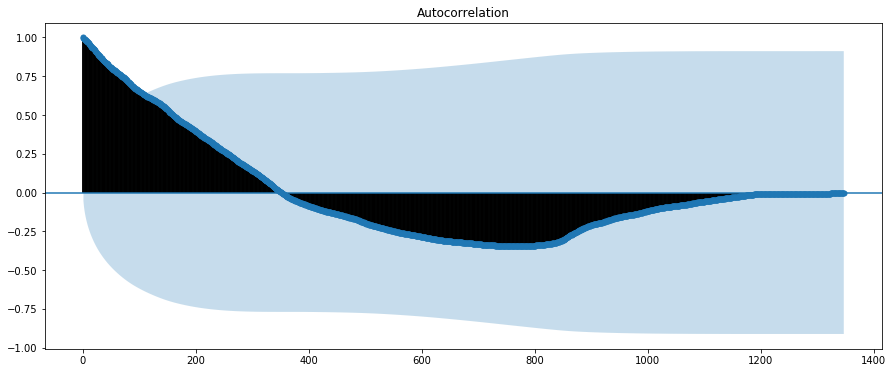

In [178]:
from pandas import Series
series = data['BTC Price']
plot_acf(series)
plt.show()

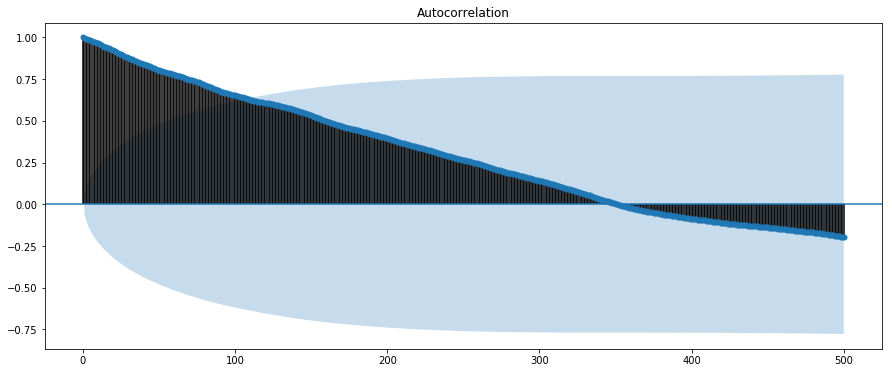

In [179]:
series = data['BTC Price']
plot_acf(series, lags=500)
plt.show()

In [180]:
#Getting locally imported modules from current notebook
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

      
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

seaborn==0.9.0
scikit-learn==0.20.2
pandas==0.24.1
numpy==1.15.4
matplotlib==3.0.2
